In [1]:
import pandas as pd
import sys
sys.path.append(r"C:\Pro\Stages\A4 - DVRC\Work\Supervised-Learning-using-Unsupervised-Learning-Metrics-in-the-absence-of-Annotated-Data\myLibraries")
from MARScore.score import MARSCore
from custom_score.utils import cleanString
from datasets_loaders.loaders import load_billsum
from sklearn.cluster import SpectralClustering, AffinityPropagation
from transformers import BertModel, BertTokenizer

import matplotlib.pyplot as plt
import numpy as np

c:\Pro\Stages\A4 - DVRC\Work\Supervised-Learning-using-Unsupervised-Learning-Metrics-in-the-absence-of-Annotated-Data\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are


### Billsum experimentation

In [ ]:
dataset = load_billsum()
subset = dataset.iloc[:2, :]

In [ ]:
#ms = MARSCore(subset["text"].to_list(), subset["summary"].to_list(), clusterizer=SpectralClustering(affinity='nearest_neighbors'))
ms = MARSCore(subset["text"].to_list(), subset["summary"].to_list())
ms.compute()

In [ ]:
_=ms.assess()

In [ ]:
print(ms)

### Pubmed experimentation

In [2]:
dataset = pd.read_json(r'C:\Pro\Stages\A4 - DVRC\Work\Datasets\pubmed\test.json', lines=True)
dataset = dataset[["article_text", "abstract_text"]]
cleaner = lambda x: ". ".join(x).replace("<S>", "").strip()
format_dot = lambda x: x.replace(" .", ".")
dataset.loc[:,"abstract_text"] = dataset["abstract_text"].replace(regex=r"\[[^\]]*\]", value="")
dataset.loc[:,"article_text"] = dataset["article_text"].replace(regex=r"\[[^\]]*\]", value="")
dataset.loc[:,"abstract_text"] = dataset["abstract_text"].map(cleaner)
dataset.loc[:,"article_text"] = dataset["article_text"].map(cleaner)
dataset.loc[:,"abstract_text"] = dataset["abstract_text"].map(cleanString)
dataset.loc[:,"article_text"] = dataset["article_text"].map(cleanString)
dataset.loc[:,"abstract_text"] = dataset["abstract_text"].map(format_dot)
dataset.loc[:,"article_text"] = dataset["article_text"].map(format_dot)
dataset = dataset.rename(columns={"abstract_text": "summary",
                        "article_text": "text"})

In [3]:
subset = dataset.iloc[3:5, :]
subset

,text,summary
3,congenital adrenal hyperplasia ( cah ) refers ...,congenital adrenal hyperplasia is a group of a...
4,type 1 diabetes ( t1d ) results from the destr...,objective(s):pentoxifylline is an immunomodula...


In [4]:
ms = MARSCore(subset["text"].to_list(),
              subset["summary"].to_list(),
              precision_level="s",
              ratio=5,
              n_allowed_elements=7,
              extraction_method="concat_l4",
              model=BertModel.from_pretrained('aitslab/biobert_huner_gene_v1'),
              tokenizer=BertTokenizer.from_pretrained('aitslab/biobert_huner_gene_v1'))
              #clusterizer=AffinityPropagation(random_state=0))
ms.compute()

In [5]:
ms.summaries

['depending on the severity and degree of 21 hydroxylase deficiency , the clinical spectrum may vary from mild form of non classical cah to classic cah. data regarding demography , clinical presentation at time of diagnosis , treatment details , height sds and bmi were collected. 29 patients were included in the study of which 22 were females ( 76% ) and 7 were males ( 24% ). one child was identified at birth via a neonatal screening program , one child presented with early pubarche , the other 5 infants presented between their 3rd and 6th week of life with features suggestive of adrenal crisis poor feeding , vomiting and failure to gain weight. 9 infants were identified at birth due to presence of genital ambiguity ( 40% ) , 1 presented with symptoms of adrenal crisis at 4 weeks of life , 4 patients presented in the pre pubertal period due to early onset adrenarche ( 18% ) , 5 patients presented in the late adolescent period with marked virilization ( 23% ) and 3 patients presented wi

In [6]:
_=ms.assess()

c:\Pro\Stages\A4 - DVRC\Work\Supervised-Learning-using-Unsupervised-Learning-Metrics-in-the-absence-of-Annotated-Data\.venv\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Scores: 
   CBERT-R  CBERT-P  CBERT-F  BERTScore-R  BERTScore-P  BERTScore-F  BARTScore   R-1   R-2   R-L
0     0.75     0.67     0.71         0.84         0.85         0.85       0.34  0.36  0.14  0.24
1     0.70     0.68     0.69         0.83         0.85         0.84       0.34  0.51  0.20  0.27

Correlations: 
               pearson_CBERT_R-1  pearson_CBERT_R-2  pearson_CBERT_R-L  pearson_BERT_R-1  pearson_BERT_R-2  pearson_BERT_R-l  pearson_BART_R-1  pearson_BART_R-2  pearson_BART_R-l
Pearson score               -1.0               -1.0               -1.0              -1.0              -1.0              -1.0               NaN               NaN               NaN
p-value                      1.0                1.0                1.0               1.0               1.0               1.0               NaN               NaN               NaN


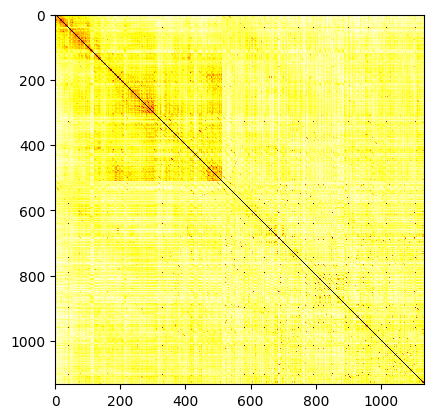

In [7]:
plt.imshow(ms.similarity_matrices[0], cmap='hot', interpolation='nearest')
plt.show()

In [8]:
print(ms)

--------MARScore OBJECT--------

Number of Documents : 2
Corpus Avg Size     : 11483
Refined Avg Size    : 1007

-------------------------------

Corpus no.1 : 85.0%
congenital adrenal hyperplasia ( cah ) refers to a group of autosomal recessive disorders caused by an enzyme deficiency which leads to defects in biosynthesis of steroid precursors.
depending on the severity and degree of 21 hydroxylase deficiency , the clinical spectrum may vary from mild form of non classical cah to classic cah.
however , the non classical cah variant is more common with a prevalence rate of 1 in 1000.
it also helps in maintaining normal levels of precursors by suppressing adreno cortico trophic hormone ( acth ).
during childhood.
, the management is largely focused on achieving normal growth and attaining appropriate final adult height.
johns medical college hospital , bangalore by the department of endocrinology on patients diagnosed to have cah and seen in the outpatient clinic between january 2012 a

In [9]:
ms.visualize(dim=2)

### Spectral Clustering - Mincut

In [ ]:
from sklearn.cluster import SpectralClustering
from MARScore.utils import *
import hdbscan

In [ ]:
v = ms.vectors
l = ms.labels

In [ ]:
clusterer = SpectralClustering(affinity='nearest_neighbors')
v_clustered = clusterer.fit(v[0])


In [ ]:
v_clustered.labels_.astype(int)

In [ ]:
clusterer.__module__

In [ ]:
hdbscan.HDBSCAN().__module__

### Saving similarity Matrix

In [ ]:
import csv

def saveSimilarityMatrix(path, mat):
    with open(path, 'w', newline='') as f:
        write = csv.writer(f)
        write.writerows(mat)

In [ ]:
saveSimilarityMatrix(r"C:\Pro\Stages\A4 - DVRC\Work\Supervised-Learning-using-Unsupervised-Learning-Metrics-in-the-absence-of-Annotated-Data\myLibraries\MARScore_output\SimMat\simmat.csv", ms.similarity_matrices[0])